读取数据从json文件中

In [1]:
import json

with open('sarcasm.json','r') as f:
    datastore = json.load(f)

sentences = []
labels=[]

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

切分数据为训练集和测试集

In [2]:
training_size = 20000

training_sentences,testing_sentences = sentences[0:training_size],sentences[training_size:]
training_labels,testing_labels = labels[0:training_size],labels[training_size:]

将句子进行词条化和序列化

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000  # 最大词典数，将按照频次的由高到低排序
oov_token = '<OOV>'  # 设置未登录的词
# 词条化
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token) 
tokenizer.fit_on_texts(training_sentences)

# 获得词典
word_index = tokenizer.word_index

# pad时的一些参数
max_length = 100  # 序列的最大长度
trunc_type = 'post'  # 在后面截断

# 训练集
# 根据词典将句子转为序列，此时的序列长度不一致
training_sequences=tokenizer.texts_to_sequences(training_sentences)

# 将序列的长度调整一致
training_padded = pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type)


# 测试集
# 根据词典将句子转为序列，此时的序列长度不一致
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
# 将序列的长度调整一致
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)


In [5]:
?tokenizer

Type:        Tokenizer
String form: <keras_preprocessing.text.Tokenizer object at 0x000002800DF1A408>
File:        c:\users\wx847\anaconda3\envs\learn_tensorflow\lib\site-packages\keras_preprocessing\text.py
Docstring:  
Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...

# Arguments
    num_words: the maximum number of words to keep, based
        on word frequency. Only the most common `num_words-1` words will
        be kept.
    filters: a string where each element is a character that will be
        filtered from the texts. The default is all punctuation, plus
        tabs and line breaks, minus the `'` character.
    lower: boolean. Whether to convert the texts to lowercase.
    split: str. Separator for word splitting.
    char_l

In [7]:
help(pad_sequences)

Help on function pad_sequences in module keras_preprocessing.sequence:

pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)
    Pads sequences to the same length.
    
    This function transforms a list of
    `num_samples` sequences (lists of integers)
    into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
    `num_timesteps` is either the `maxlen` argument if provided,
    or the length of the longest sequence otherwise.
    
    Sequences that are shorter than `num_timesteps`
    are padded with `value` at the beginning or the end
    if padding='post.
    
    Sequences longer than `num_timesteps` are truncated
    so that they fit the desired length.
    The position where padding or truncation happens is determined by
    the arguments `padding` and `truncating`, respectively.
    
    Pre-padding is the default.
    
    # Arguments
        sequences: List of lists, where each element is a sequence.
        maxlen: Int, m

初始分类器模型

In [11]:
import tensorflow as tf

embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(), # 取均值，降低维度
    tf.keras.layers.Dense(21,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

查看一下网络的结构

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 21)                357       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 22        
Total params: 160,379
Trainable params: 160,379
Non-trainable params: 0
_________________________________________________________________


In [16]:
help(model.complie)

AttributeError: 'Sequential' object has no attribute 'complie'

编译模型，指定优化函数和损失函数

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

训练模型

In [25]:
import numpy as np

num_epochs = 30
print(type(np.array(training_padded)))
print(type(training_padded))

print(type(np.array(training_labels)))
print(type(training_labels))
training_labels_array= np.array(training_labels)
testing_labels_array= np.array(testing_labels)

history = model.fit(training_padded,training_labels_array,epochs=num_epochs,validation_data=(testing_padded,testing_labels_array),verbose=2)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.6648 - accuracy: 0.5898 - val_loss: 0.5859 - val_accuracy: 0.6676
Epoch 2/30
20000/20000 - 2s - loss: 0.4413 - accuracy: 0.8264 - val_loss: 0.3963 - val_accuracy: 0.8290
Epoch 3/30
20000/20000 - 2s - loss: 0.3186 - accuracy: 0.8738 - val_loss: 0.3609 - val_accuracy: 0.8451
Epoch 4/30
20000/20000 - 2s - loss: 0.2665 - accuracy: 0.8977 - val_loss: 0.3640 - val_accuracy: 0.8375
Epoch 5/30
20000/20000 - 2s - loss: 0.2298 - accuracy: 0.9115 - val_loss: 0.3443 - val_accuracy: 0.8566
Epoch 6/30
20000/20000 - 2s - loss: 0.2026 - accuracy: 0.9239 - val_loss: 0.3522 - val_accuracy: 0.8529
Epoch 7/30
20000/20000 - 2s - loss: 0.1814 - accuracy: 0.9316 - val_loss: 0.3580 - val_accuracy: 0.8556
Epoch 8/30
20000/20000 - 2s - loss: 0.1613 - accuracy: 0.9417 - val_loss: 0.3706 - val_accuracy: 0.8544
Epoch 9/30
20000/20000 - 2s - lo

以图表的形式展示训练过程

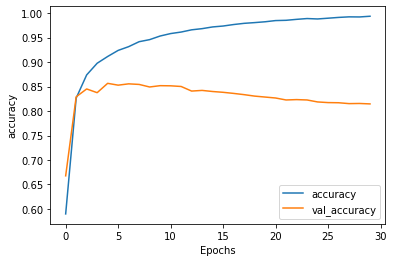

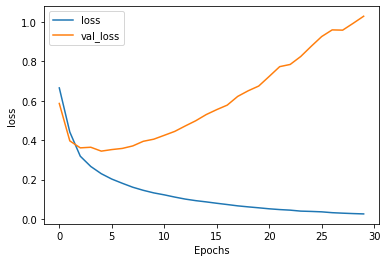

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
    
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

分别是训练集和测试集上的准确率、损失率

In [39]:
# 将键值反转
reverse_word_index = {v:k for k,v in word_index.items()}

def decode_sentence(text_seq):
    """将矩阵转成文本"""
    return ' '.join([reverse_word_index.get(i, '?') for i in text_seq])

print(training_sentences[2])  # 原话
print(decode_sentence(training_sequences[2]))  # 可转成原话
print(decode_sentence(training_padded[2])) # 通过pad转成的话，会在前面或者后面有？填充
print(training_labels[2])  # 这句话的标签
# 如下图


mom starting to fear son's web series closest thing she will have to grandchild
mom starting to fear son's web series closest thing she will have to grandchild
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? mom starting to fear son's web series closest thing she will have to grandchild
1


获取embedding层的权重，后续可以进行可视化

In [41]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # shape: (vocab_size, embedding_dim)

(10000, 16)


In [42]:
out_v = open('sarcasm_vecs.tsv','w',encoding='utf-8')
out_m = open('sarcasm_meta.tsv','w',encoding='utf-8')

for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    embeddings= weights[word_num]
    out_m.write(word+'\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_m.close()
out_v.close()

可视化网站

http://projector.tensorflow.org/

load  加载选择数据
Sphereize data  球形化数据

搜索boring  全是负面相关的
搜索exciting  正向的
搜索oscar  都是